In [1]:
%matplotlib inline
import EMPIRIC_analysis_EXP as emp
import MSA_analysis_EXP as msa
import pandas  as pd
from scipy import stats as st
# !pwd
import matplotlib.pyplot as plt
#!ls
from Bio import SeqUtils

aacids = list(SeqUtils.IUPAC.protein.letters)

In [2]:
feat_fname = '../AccessDB-files/features-original.csv'
data_fname = '../AccessDB-files/db-fitness.csv'
# msa_fname  = '../AccessDB-files/uclust/PRALINE/alignment432_clust.fasta_ali'
# msa_fname = "../AccessDB-files/IGPS_seq_Praline_align/new-PRALINE-aln.fasta"
msa_fname = "./PFam/PF00218_full-Aln_fixed.fasta"

!pwd
!dropbox.py status

/data/home/venevs/Dropbox (UMASS MED - BIB)/TIM_EMPIRIC
Up to date


In [11]:
# EMPIRIC ...

# merged_dat
rrr,proj_w = emp.EMPIRIC_pipeline(feat_fname, data_fname, dataset=['Ss','Tm','Tt'])
# # dat = pd.read_csv(data_fname)
# # emp.filterDataset(dat, dataset=['Ss','Tm','Tt'])
# # pd.merge?
# # len(emp.aacids)
list(rrr.columns)

rrr['fitness'] = rrr[aacids].mean(axis=1)
rrr['min_fitness'] = rrr[aacids].min(axis=1)
rrr['max_fitness'] = rrr[aacids].max(axis=1)

# hhh=['align_orth_1-82',
#  'align_bab_1-22',
#  'align_b_1-12',
#  'struct_021',
#  'Loop-Type',
#  'beta_inout',
#  'conservation',
#  'cataylsis',
#  'binding',
#  'ilvcluster','wtKD']


variation explained by components for dataset:  ['Ss', 'Tm', 'Tt']
PC1 51.8%
PC2 17.2%
PC3 7.1%
PC4 3.7%
PC5 3.3%
PC6 2.7%
PC7 2.2%
PC8 1.6%
PC9 1.5%
PC10 1.4%
PC11 1.3%
PC12 1.1%
PC13 0.9%
PC14 0.8%
PC15 0.7%
PC16 0.7%
PC17 0.6%
PC18 0.5%
PC19 0.5%
PC20 0.2%


In [12]:
mmm = msa.MSA_pipeline_W(feat_fname,proj_w,msa_fname,dataset=['Ss','Tm','Tt'])

Ss is located at following position in alignment:  1244
Tm is located at following position in alignment:  1591
Tt is located at following position in alignment:  1137
The following sequences must match, unless there is any trimming:
NITAIIAEYKYAVGLSILTESIPILMKDFIGADTVLLIVKMEPLIEINDEGARFIGINSRSNVVKVAESGGVNAFLIGSS
NITAIIAEYKYAVGLSILTESIPILMKDFIGADTVLLIVKMEPLIEINDEGARFIGINSRSNVVKVAESGGVNAFLIGSS
                 A    C     D     E     F     G    H     I     K     L    M  \
organism-pos                                                                  
Ss-44           73    2   148    95    80   424   35     9   117     4    3   
Ss-45           57    4   111    69    16   356   28     3   200    75    7   
Ss-46          126   22     0     0    52     9   10   179     4   251   58   
Ss-47          604   10     0     2     6   381   22    14    45     2    0   
Ss-48            4    4     0     0   204     0    0   321     0   542    4   
Ss-49           15    3     0     0     5     0    

In [13]:
sss = msa.MSSA_pipeline_W(feat_fname,proj_w,msa_fname,dataset=['Ss','Tm','Tt'])
# mmm.fillna?

Checking is already done for structural alignments ...
               A  C   D  E   F   G  H   I   K   L  M   N   P  Q  R   S   T  \
organism-pos                                                                 
Ss-44          3  0   0  0   1   3  1   1   0   3  2   4   1  2  5   3   1   
Ss-45          1  0   1  2   1   4  1   4   2   1  0   3   1  0  5   3   2   
Ss-46          3  0   0  1   2   2  0   4   3   6  1   4   6  1  0   2   7   
Ss-47          5  0   1  2   1   1  0   9   7   7  1   2   9  0  6   5   3   
Ss-48          3  1   2  0  12   1  0  13   1  13  1   1   4  1  1   1   1   
Ss-49          7  0   3  0   6  18  1  11   1   2  4   0   1  2  2   4   0   
Ss-50          9  1   0  2   4   6  4   7   0   7  1   2   3  2  1   5   5   
Ss-51         10  2   1  6   3   5  5   3   0   1  2  11   2  4  2   4   2   
Ss-52          4  3   1  0   6   2  5   5   1   7  3   3   2  2  0   4   8   
Ss-53          3  1   7  4   4   9  2   5   7   5  3   2   2  0  0   1   5   
Ss-76    

True
0    44
1    45
2    46
3    47
4    48
Name: res_num, dtype: int64
0    44
1    45
2    46
3    47
4    48
Name: pos, dtype: object


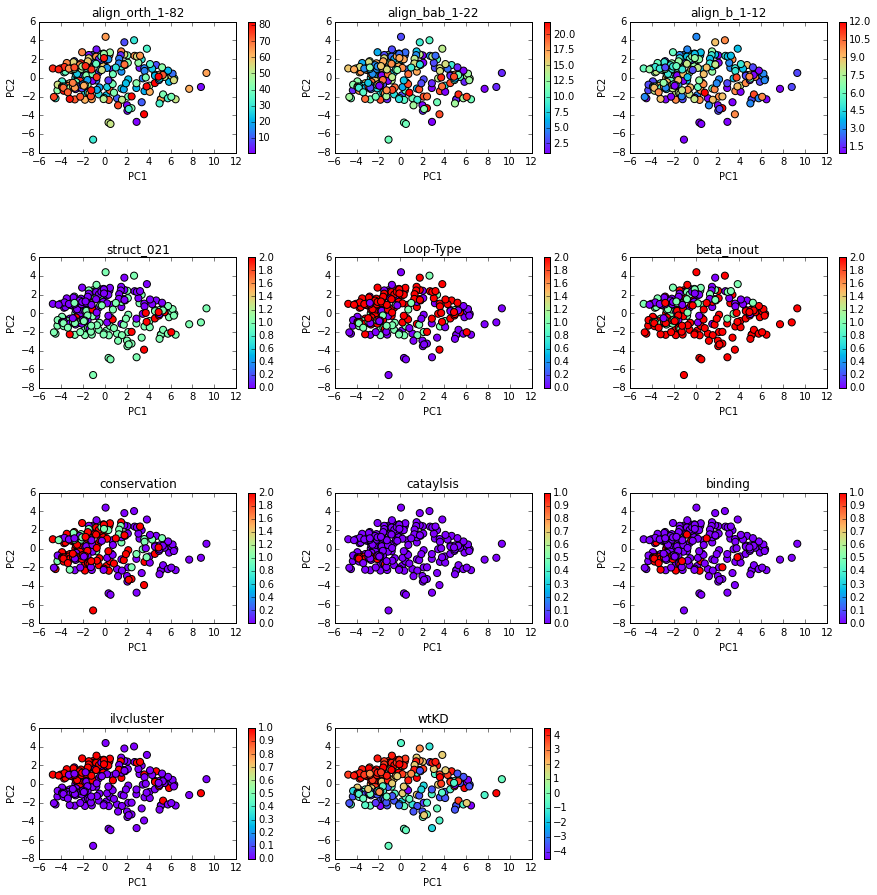

In [14]:



def getScatter(hhh, rrr):
    color_map_name = 'rainbow'
    #plot layout
    numfeatures = len(hhh) #skip first 22 rows: 20 aa, org-pos, and wtaa identifiers
    numColumns = 3
    numRows = ((numfeatures-1)//numColumns)+1 #ceiling function
    remainder = numfeatures - numRows*numColumns

    fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=.8)
    x='PC1'
    y='PC2'
    
    for i in range(numfeatures):
        ax = fig.add_subplot(numRows,numColumns,i+1)
        cfeature = str(hhh[i])
        vmin,vmax = rrr[cfeature].min(),rrr[cfeature].max()
        ax.set_title('%s' %cfeature)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        scat_obj = ax.scatter(rrr[x], rrr[y], s=50, cmap=color_map_name, c=rrr[cfeature],vmin=vmin,vmax=vmax)
        fig.colorbar(scat_obj)    
#     plt.suptitle('PC%d vs PC%d - %s' %(pc1_nom, pc2_nom,dataset), size = 16)
#     fig.savefig('PC%dvsPC%d-colorbyvariable-%s.pdf' %(pc1_nom, pc2_nom, dataset))


getScatter(hhh,rrr)

# for i in rrr.columns:
#     print i
print (rrr['res_num'] ==rrr['pos'].apply(int)).all()
print rrr['res_num'].head()
print rrr['pos'].head()

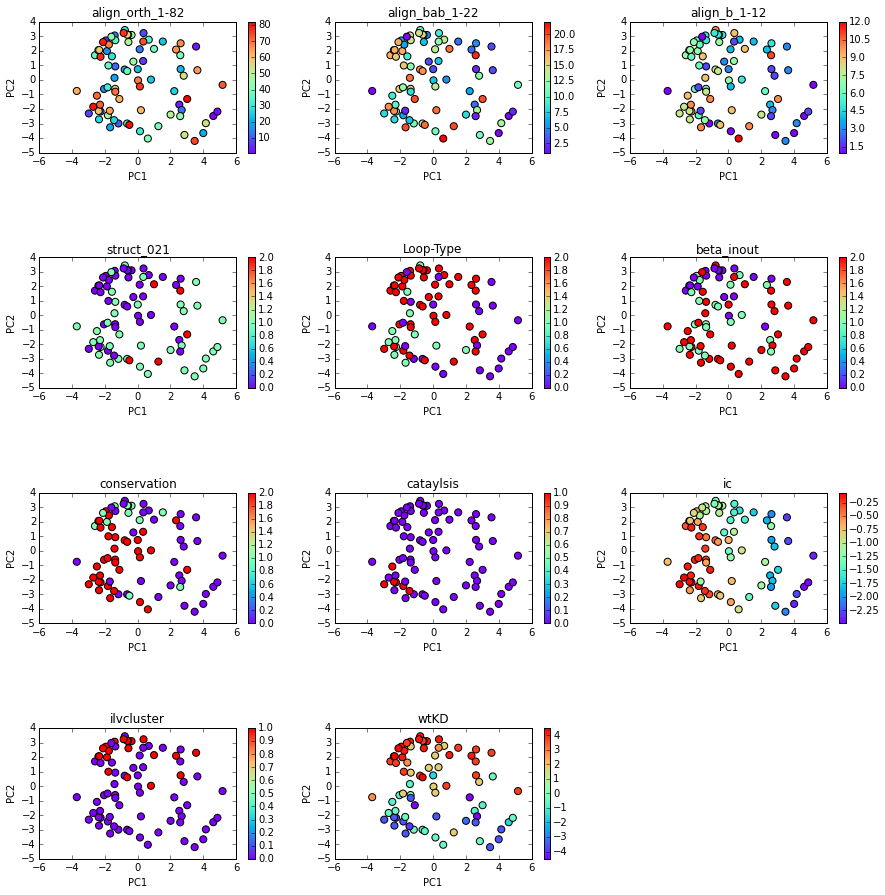

In [15]:
# mmm.head()

hhh=['align_orth_1-82',
 'align_bab_1-22',
 'align_b_1-12',
 'struct_021',
 'Loop-Type',
 'beta_inout',
 'conservation',
 'cataylsis',
 'ic',
 'ilvcluster','wtKD']

# getScatter(hhh,mmm.iloc[:80])
getScatter(hhh,mmm[mmm.organism=='Tt'])

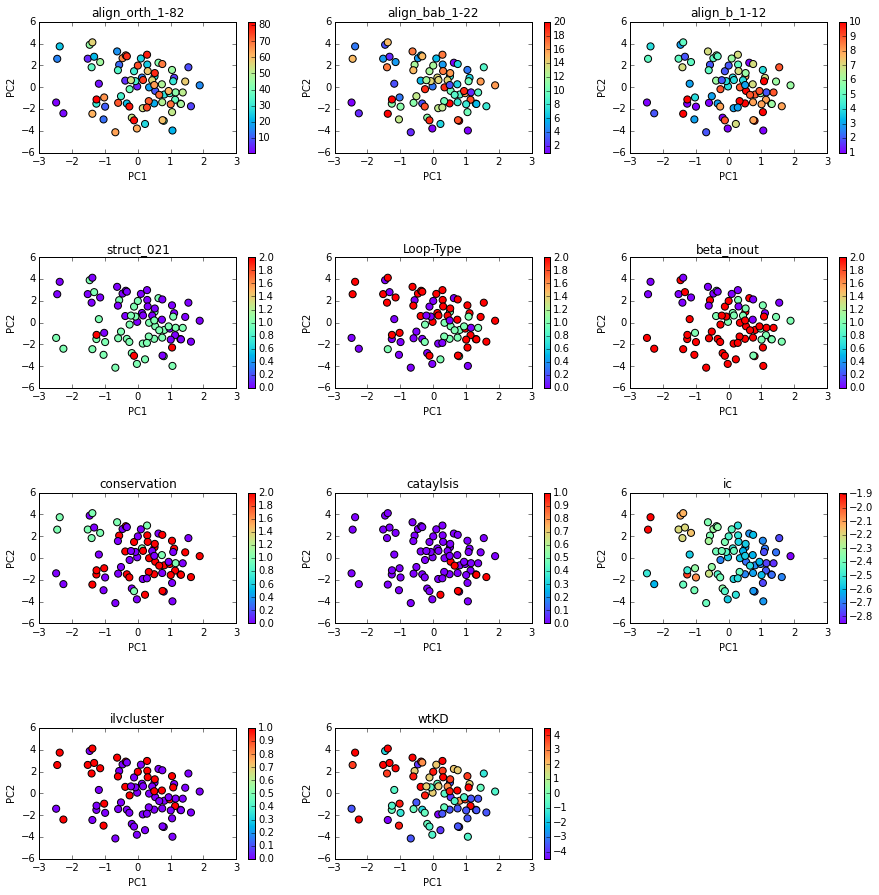

In [16]:
# mmm.head()

hhh=['align_orth_1-82',
 'align_bab_1-22',
 'align_b_1-12',
 'struct_021',
 'Loop-Type',
 'beta_inout',
 'conservation',
 'cataylsis',
 'ic',
 'ilvcluster','wtKD']

getScatter(hhh,sss[sss.organism=='Ss'])

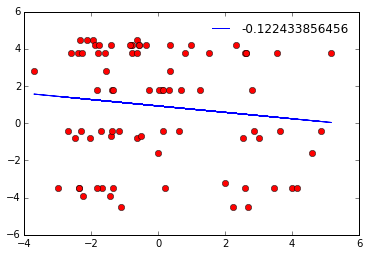

In [20]:
mmm.shape
# x,y = rrr['PC2'].iloc[:80],mmm['PC2'].iloc[:80]
# print mmm['organism-pos']

ttt = mmm[mmm.organism=='Tt']


x,y = ttt['PC1'],ttt['wtKD']
# x,y = rrr['PC1'].iloc[:80],mmm['PC2'].iloc[:80]
# print len(x)

plt.plot(x,y,'ro')
a,b,r,p,_ = st.linregress(x,y)
plt.plot(x,a*x+b,'b-',label=str(r))
plt.legend(frameon=False)

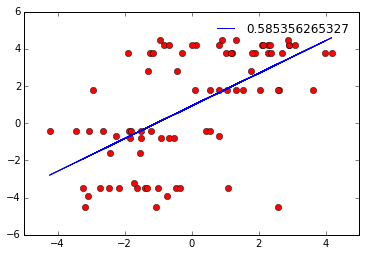

In [26]:
sss.shape
# x,y = rrr['PC2'].iloc[:80],mmm['PC2'].iloc[:80]
# print mmm['organism-pos']

ttt = sss[sss.organism=='Tt']

x,y = ttt['PC2'],ttt['wtKD']
# x,y = rrr['PC1'].iloc[:80],mmm['PC2'].iloc[:80]
# print len(x)

plt.plot(x,y,'ro')
a,b,r,p,_ = st.linregress(x,y)
plt.plot(x,a*x+b,'b-',label=str(r))
plt.legend(frameon=False)

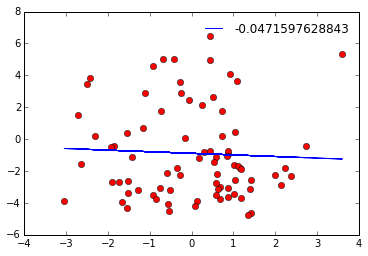

In [91]:
def sc(x,y):
    plt.plot(x,y,'ro')
    a,b,r,p,_ = st.linregress(x,y)
    plt.plot(x,a*x+b,'b-',label=str(r))
    plt.legend(frameon=False)

sss.shape
# x,y = rrr['PC2'].iloc[:80],mmm['PC2'].iloc[:80]
# print mmm['organism-pos']
org = 'Tm'

# rrr['mean_fit'] = rrr[emp.aacids].mean(axis=1)


tim = sss[sss.organism==org]
mscan = rrr[rrr.organism==org]
praline = mmm[mmm.organism==org]

x,y = praline['PC3'],mscan['PC1']
# x,y = rrr['PC1'].iloc[:80],mmm['PC2'].iloc[:80]
# print len(x)
sc(x,y)
# import numpy as np
# plt.figure(figsize=(21,3))
# plt.bar(range(len(y)),(y))
# plt.ylim((-1.8,-3.0))


In [82]:
# # SAVING RESULTS TO FILE ...
# rrr.to_csv('EMPIRIC_PROCESSED.csv',index=False)
# sss.to_csv('TIM_MSSA_PROCESSED.csv',index=False)
# mmm.to_csv('IGPS_PROCESSED.csv',index=False)

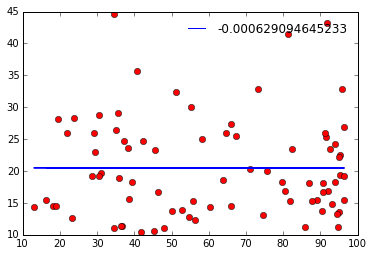

In [63]:

organism = 'Ss'

msa_res = mmm[mmm.organism==organism]
mssa_res = sss[sss.organism==organism]

x,y = msa_res['perc_cons'],mssa_res['perc_cons']
# x,y = rrr[''],mssa_res['perc_cons']
# x,y = rrr['PC1'].iloc[:80],mmm['PC2'].iloc[:80]
# print len(x)

plt.plot(x,y,'ro')
a,b,r,p,_ = st.linregress(x,y)
plt.plot(x,a*x+b,'b-',label=str(r))
plt.legend(frameon=False)

# list(msa_res.columns)


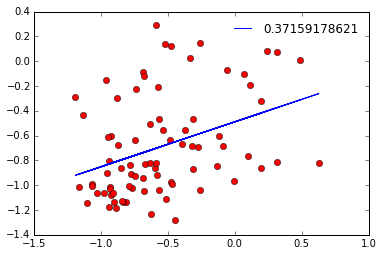

In [62]:

organism1,organism2 = 'Ss','Tm'

o1 = rrr[rrr.organism==organism1]
o2 = rrr[rrr.organism==organism2]

feature_name = 'fitness' 
x,y = o1[feature_name], o2[feature_name]
# x,y = rrr['PC1'].iloc[:80],mmm['PC2'].iloc[:80]
# print len(x)

plt.plot(x,y,'ro')
a,b,r,p,_ = st.linregress(x,y)
plt.plot(x,a*x+b,'b-',label=str(r))
plt.legend(frameon=False)


# list(o1.columns)
